# Лабораторна 1 — Марковські процеси

## Import

In [1]:
from task_1 import task_1
from task_2 import task_2
from task_3 import task_3
from task_4 import task_4
from task_5 import task_5
from task_6 import task_6

## Завдання 1

![Task1](../Images/1.png)

100%|██████████| 1/1 [00:00<00:00,  2.61it/s]


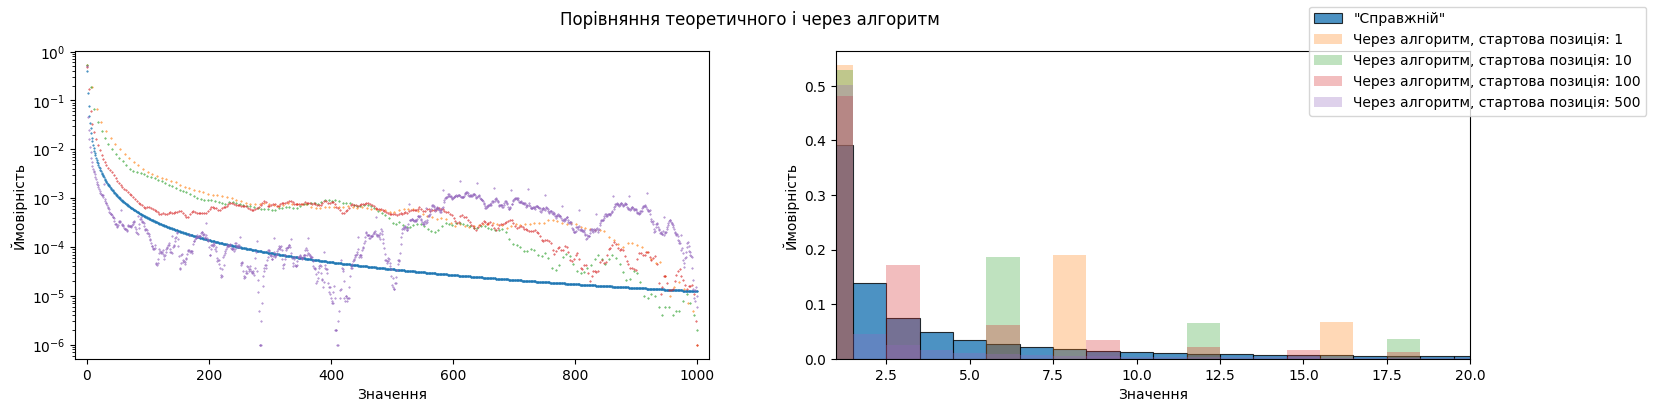

In [2]:
task_1(i_lims = [1, 1000], n = int(1e6), start_pos = [1, 10, 100, 500], figsize = (18, 4))

## Завдання 2

![Task2](../Images/2.png)

In [3]:
result = task_2("../Data/TheWarOfTheWorlds.txt", "../Data/TheTimeMachine.txt", iterations=250, report_every=500)
result["best_score"]

Start score: -655692.42, unique learn chars: 26



  2%|▏         | 4/250 [00:00<00:15, 16.33it/s]


iter 1/250 | curr -655692.42 | best -655692.42



100%|██████████| 250/250 [00:16<00:00, 15.44it/s]


[Example outputs]

[Ciphered sample]
 kgi slde fsx murg uli, osdf u rgbdusl fgxsdudsel,
deai fst fg oux xvmmgbslh mbet engboebk, ud ofsrf fg auvhfgi fvhgay. S
bgtgtjgb fst xdulislh sl dfg ecgl ieebouy, juoaslh heei-lshfd.

S xfubgi u 

[Deciphered sample]
 wer itou fis page atr, niof a gemoait fesioaoiut,
oulr fid fe nas scppemith pmud ukemnumw, ao nfigf fe lachfer fchely. I
mededjem fid soatrith it ofe ubet ruumnay, janlith huur-tihfo.

I sfamer a 

[True mapping]
{'a': 'u', 'b': 'j', 'c': 'r', 'd': 'i', 'e': 'g', 'f': 'm', 'g': 'h', 'h': 'f', 'i': 's', 'j': 'z', 'k': 'k', 'l': 'a', 'm': 't', 'n': 'l', 'o': 'e', 'p': 'c', 'q': 'p', 'r': 'b', 's': 'x', 't': 'd', 'u': 'v', 'v': 'n', 'w': 'o', 'x': 'q', 'y': 'y', 'z': 'w'}

[Recovered mapping]
{'a': 'l', 'b': 'm', 'c': 'b', 'd': 'o', 'e': 'u', 'f': 'f', 'g': 'e', 'h': 'h', 'i': 'r', 'j': 'j', 'k': 'w', 'l': 't', 'm': 'p', 'n': 'k', 'o': 'n', 'p': 'x', 'q': 'z', 'r': 'g', 's': 'i', 't': 'd', 'u': 'a', 'v': 'c', 'w': 'q', 'x': 's', 'y': '

np.float64(-496114.9856582716)

## Завдання 3

![Task3](../Images/3.png)

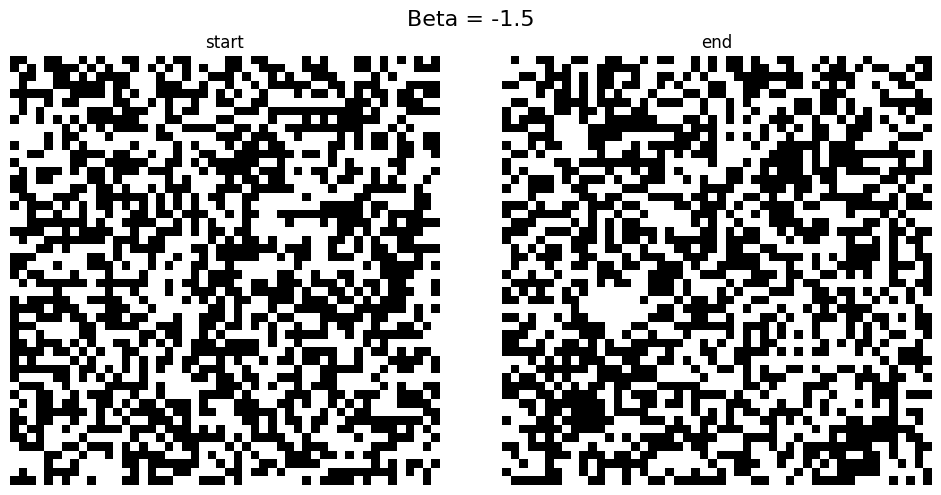

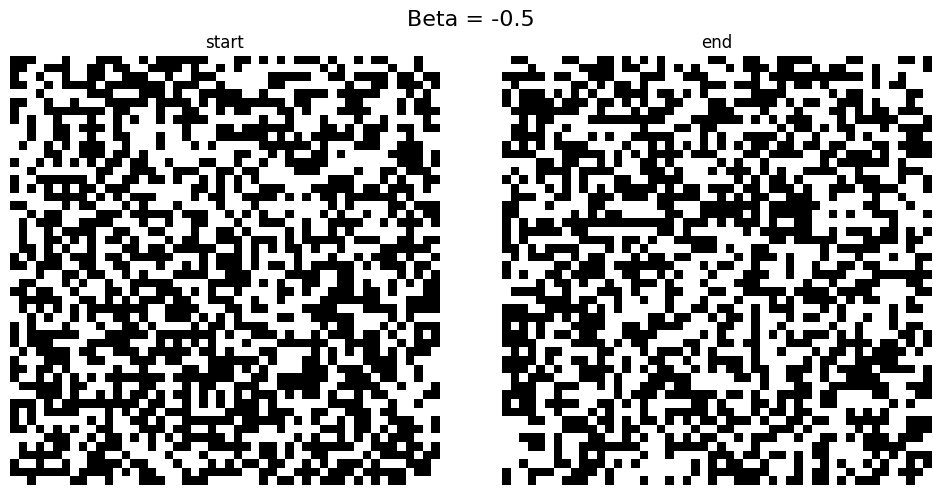

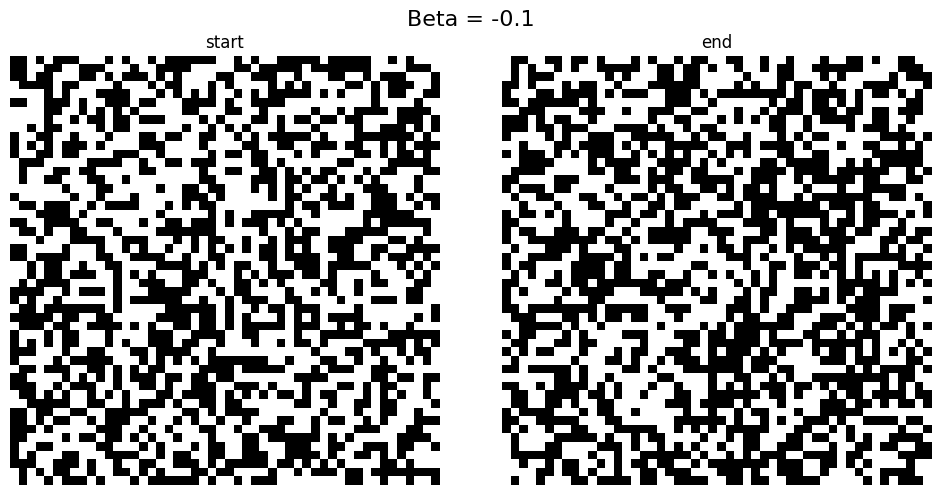

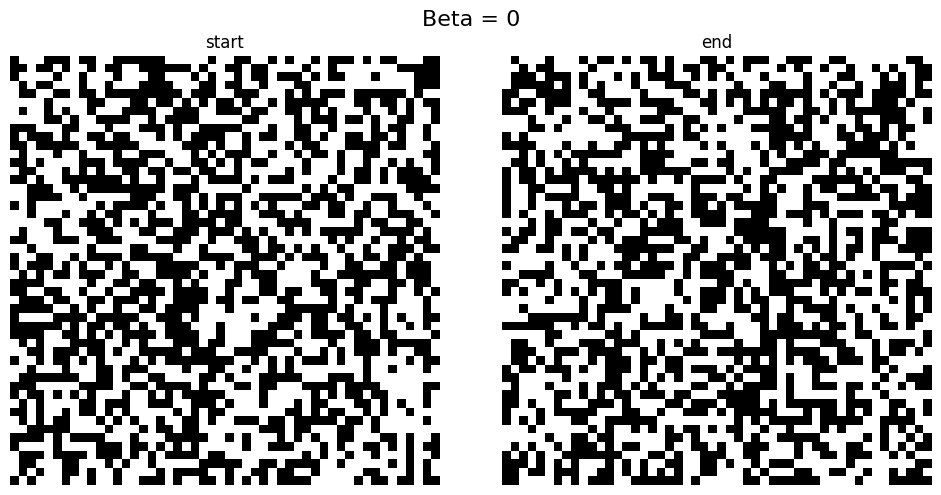

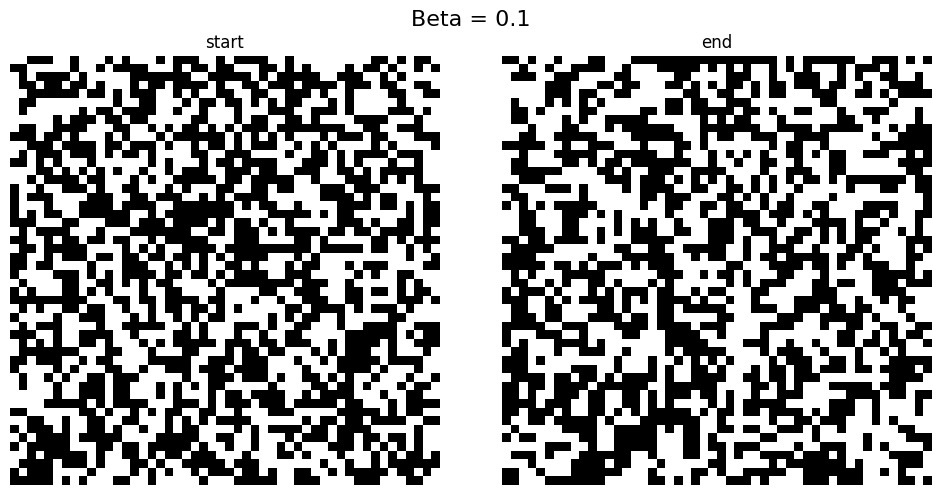

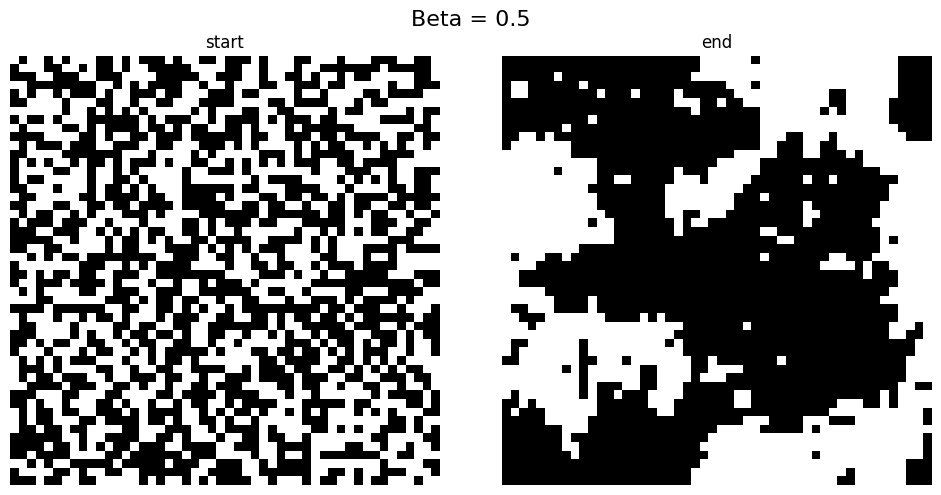

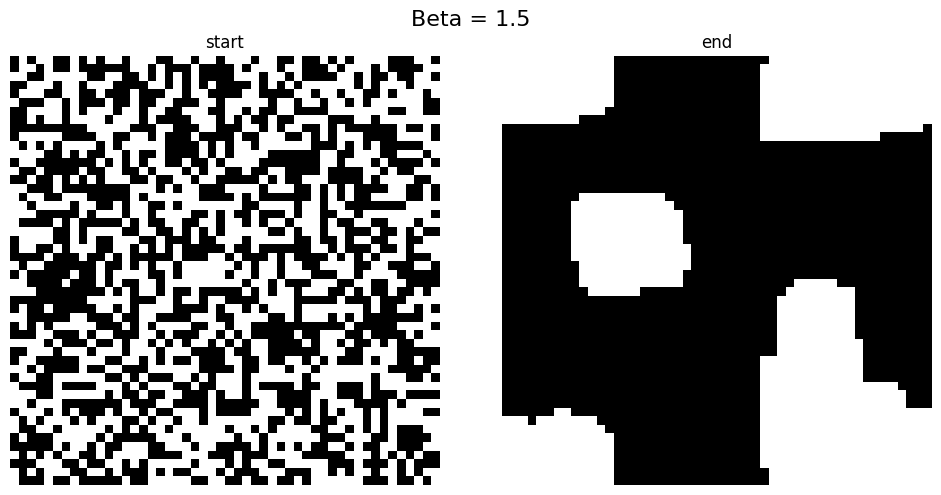

In [4]:
task_3(betas = [-1.5, -0.5, -0.1, 0, 0.1, 0.5, 1.5])

## Завдання 4

![Task4](../Images/4.png)

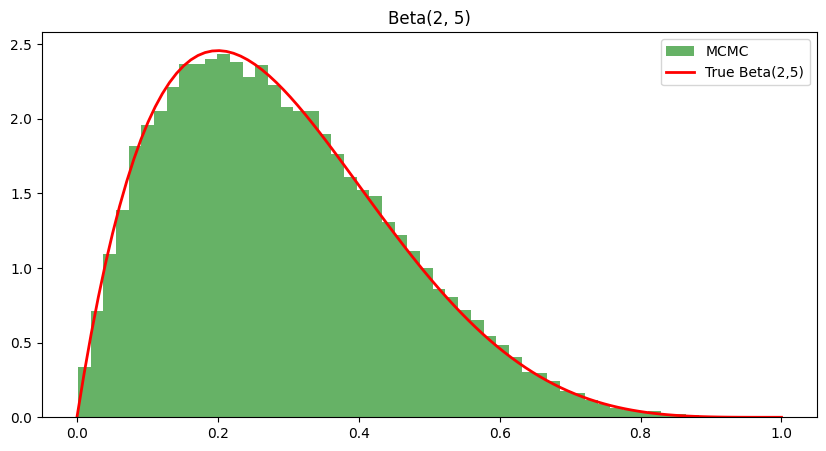

In [5]:
task_4(a=2, b=5, n_samples=50000)

## Завдання 5

![Task5](../Images/5.png)

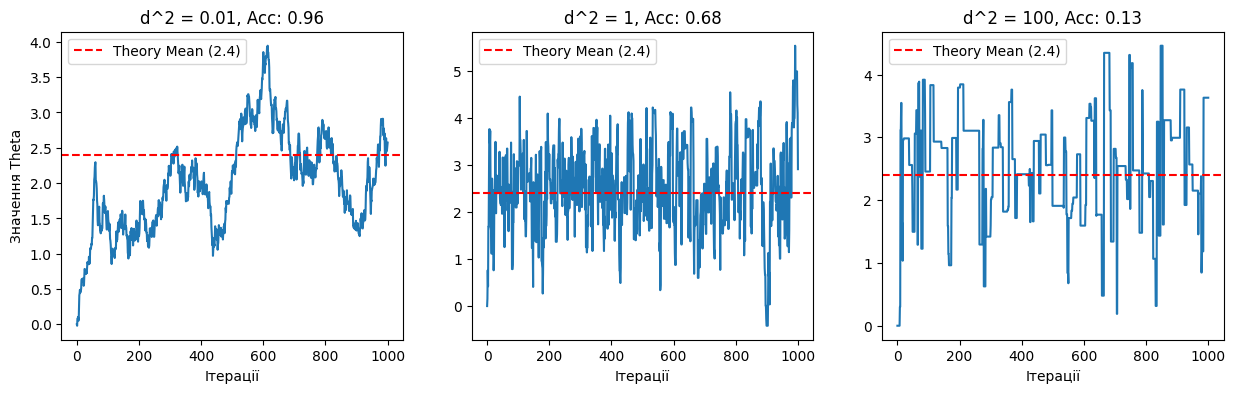

In [6]:
task_5(d_squared_list=[0.01, 1, 100])

## Завдання 6

![Task6](../Images/6.png)

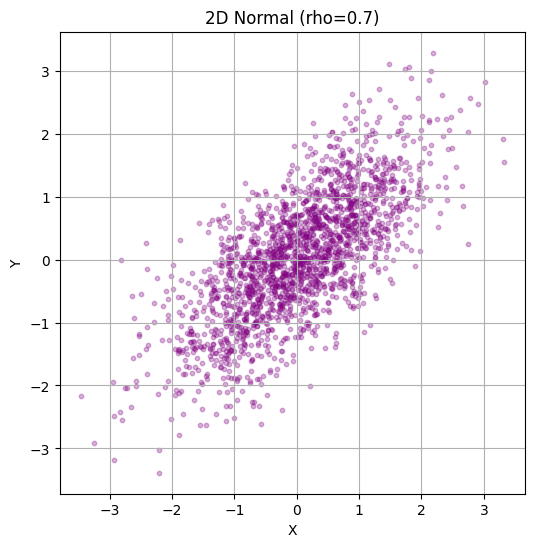

In [7]:
task_6(rho=0.7)